# Exercices Session5

# Exercice 1 page 368

This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane $1 + 3X_1 - X_2 = 0$. Indicate the set of points for which $1 + 3X_1 - X_2 > 0$, as well as the set of points for which $1 + 3X_1 - X_2 < 0$.

(b) On the same plot, sketch the hyperplane $-2 + X_1 + 2X_2 = 0$. Indicate the set of points for which $-2 + X_1 + 2X_2 > 0$, as well as the set of points for which $-2 + X_1 + 2X_2 < 0$.

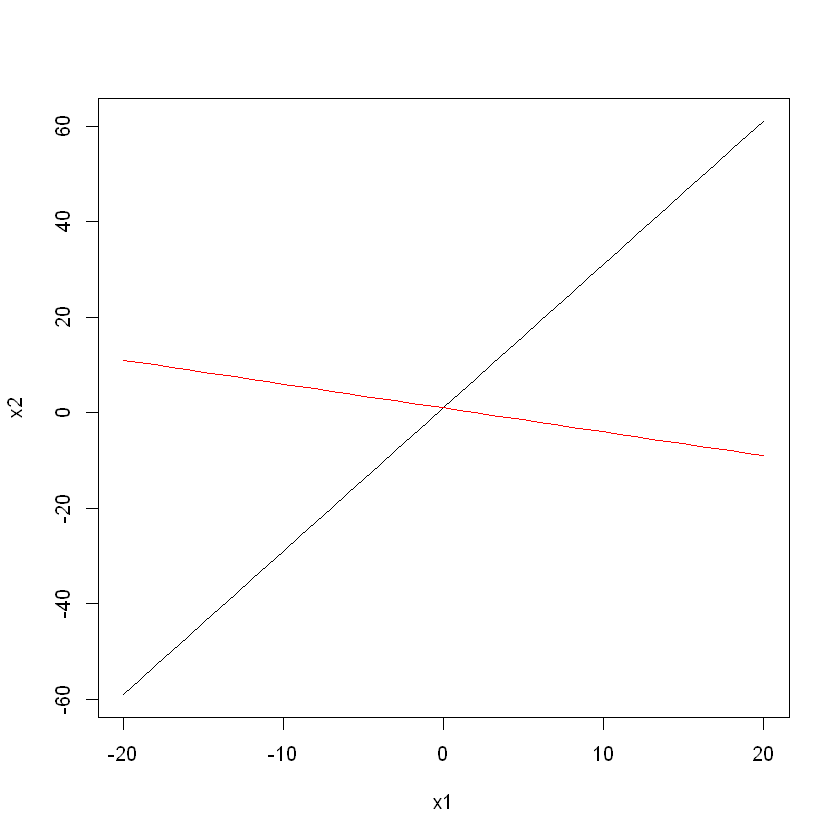

In [9]:
x1 <- -20:20
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "black")
lines(x, 1 - x1/2, col = "red")

# exercice 2 page 368

We have seen that in p=2 dimensions, a linear boundary takes the form β0+β1X1+β2X2=0. We now investigate a non-linear decision boundary.

(a) Sketch the curve

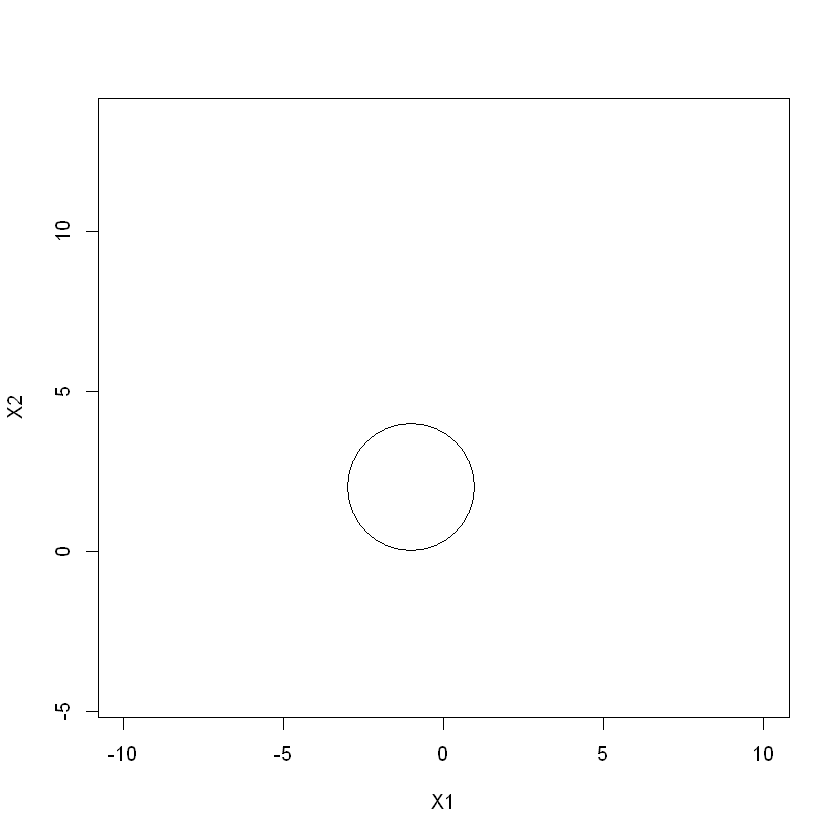

In [11]:
plot(NA, NA, type = "n", xlim = c(-10, 10), ylim = c(-1, 10), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

(b) On your sketch, indicate the set of points for which
(1+X1)2+(2−X2)2>4,
as well as the set of points for which
(1+X1)2+(2−X2)2≤4.

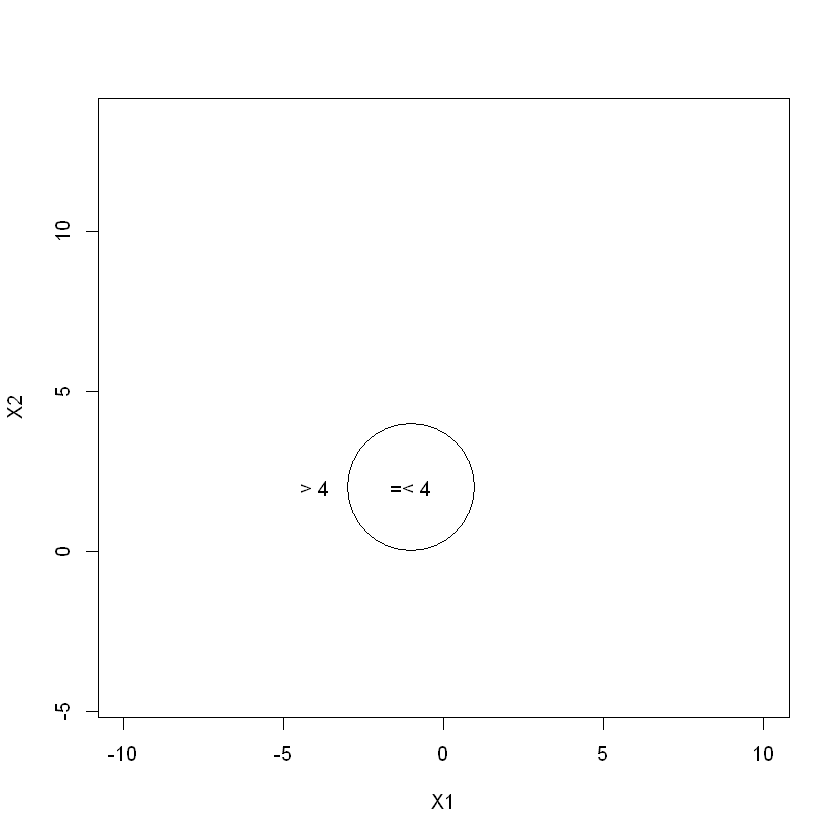

In [14]:
plot(NA, NA, type = "n", xlim = c(-10, 10), ylim = c(-1, 10), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(-1, 2, "=< 4")
text(-4, 2, "> 4")

(c) Suppose that a classifier assigns an observation to the blue class if
(1+X1)2+(2−X2)2>4,
and to the red class otherwise. To what class is the observation (0,0) classified ? (−1,1) ? (2,2) ? (3,8) ?
It suffices to replace X1 and X2 by the coordinates of the points in the equation and to check if the result is less or greater than 4. For (0,0), we have 5>4 (blue class), for (−1,1), we have 1<4 (red class), for (2,2), we have 9>4 (blue class), for (3,8), we have 52>4 (blue class).

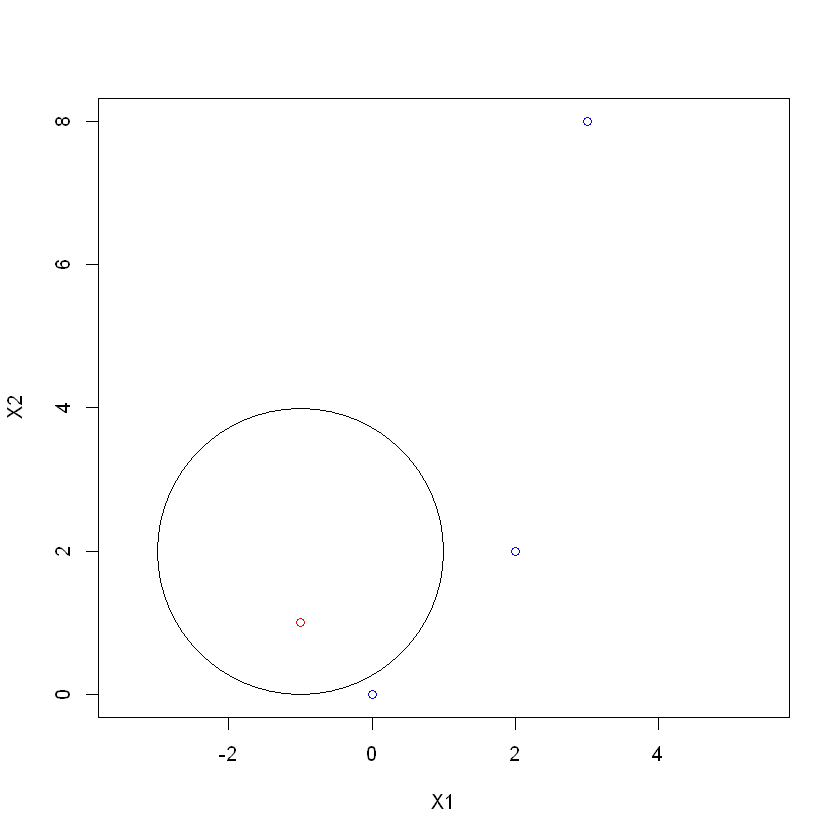

In [15]:
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

(d) Argue that while the decision boundary in (c) is not linear in terms of X1 and X2, it is linear in terms of X1, X21, X2 and X22.

# exercice 4 page 369

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on test data ? Make plots and report training and test error rates in order to back up your assertions.

Warning message:
"package 'e1071' was built under R version 3.6.3"

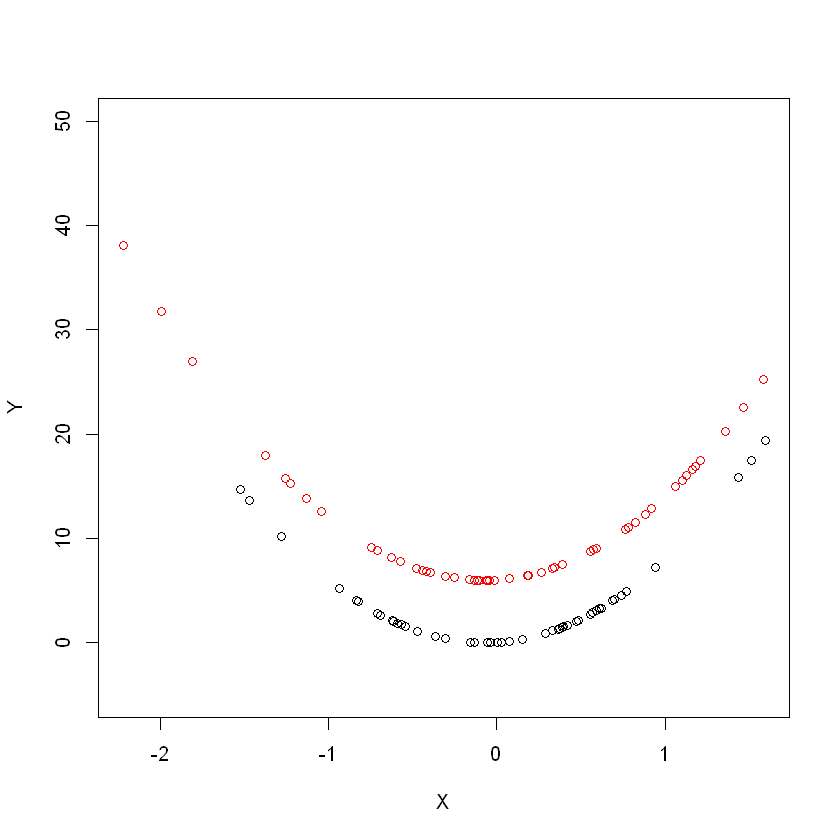

In [2]:
#generate the data

library(e1071)
set.seed(1)
x <- rnorm(100)
y <- 7 * x^2 + 3 + x
class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "red", xlab = "X", ylab = "Y", ylim = c(-5, 50))
points(x[-class], y[-class])

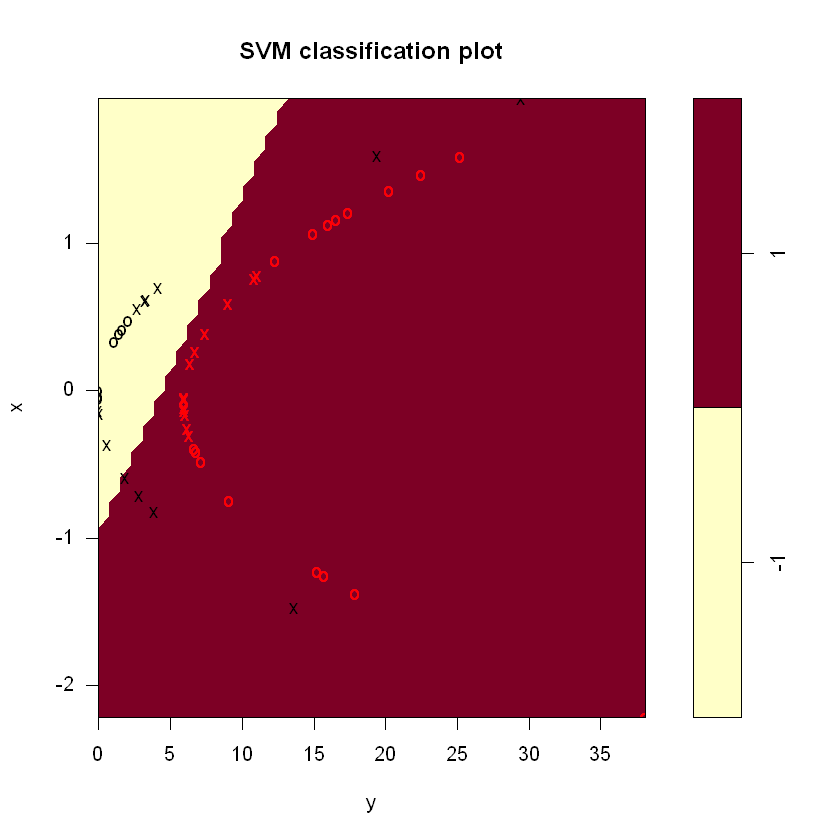

In [3]:
#fit a classifier

z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [4]:
table(estimations = predict(svm.linear, data.train), true = data.train$z)

           true
estimations -1  1
         -1 14  0
         1   6 30

function (object, ...) 
UseMethod("predict")
<bytecode: 0x0000000048a0dad0>
<environment: namespace:stats>

The classifier reports 6 errors over 50 predictions.


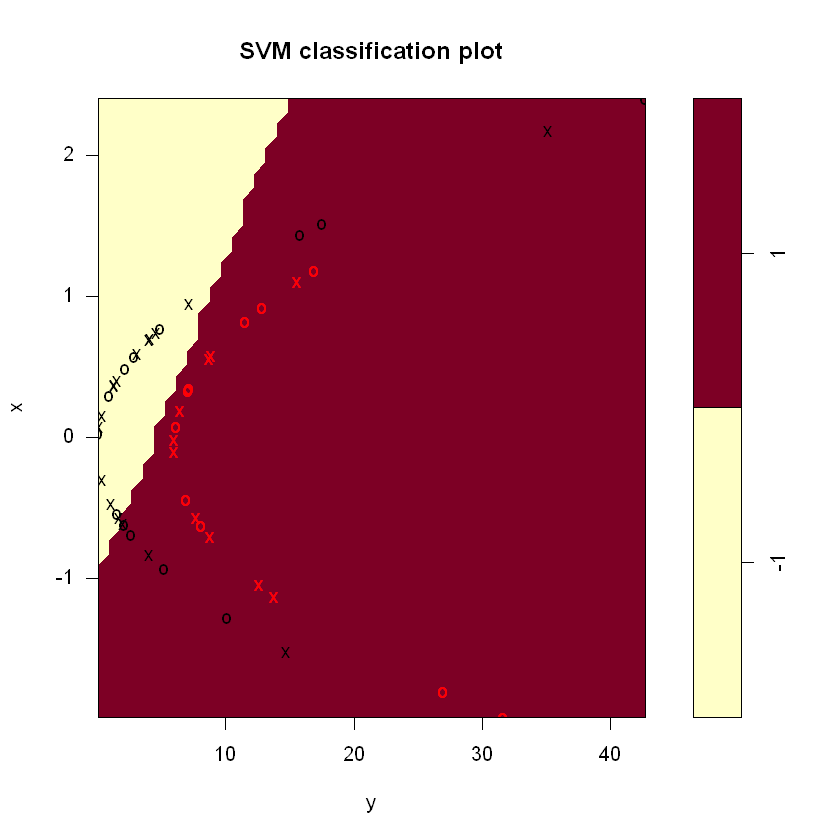

In [14]:
#performance on the test set

plot(svm.linear, data.test)

In [15]:
table(estimations = predict(svm.linear, data.test), true = data.test$z)

           true
estimations -1  1
         -1 18  0
         1  12 20

The linear models leads to 12 errors on the test set

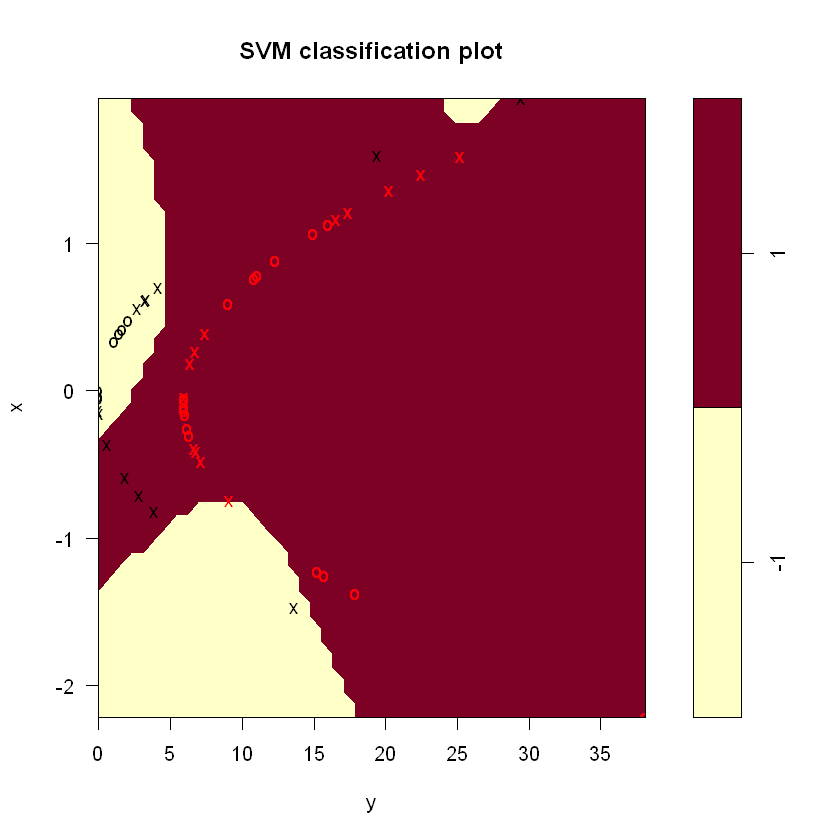

In [5]:
#we try to fit the model with a polynomial kernel this time

svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

In [6]:
table(estimations = predict(svm.poly, data.train), true = data.train$z)

           true
estimations -1  1
         -1 14  0
         1   6 30

The polynomial kernel provides the salme number of errors : 6 errors

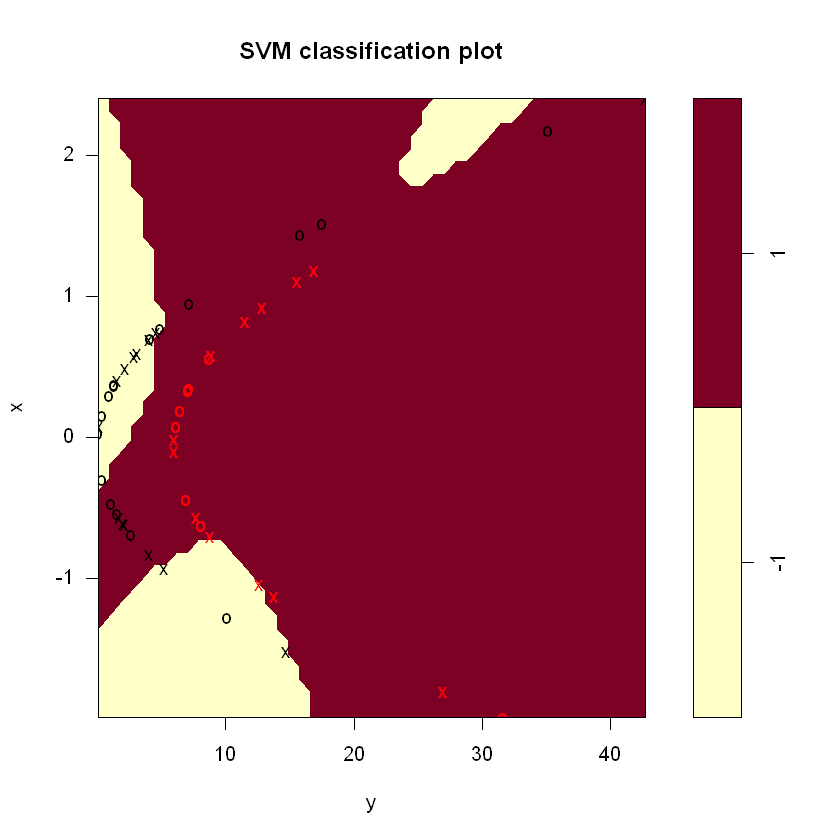

In [7]:
#performance on the test set

plot(svm.poly, data.test)

In [13]:
table(estimations = predict(svm.poly, data.test), true = data.test$z)

           true
estimations -1  1
         -1 13  0
         1  17 20

The poly function applied on this model leads to 17 errors on the test set.

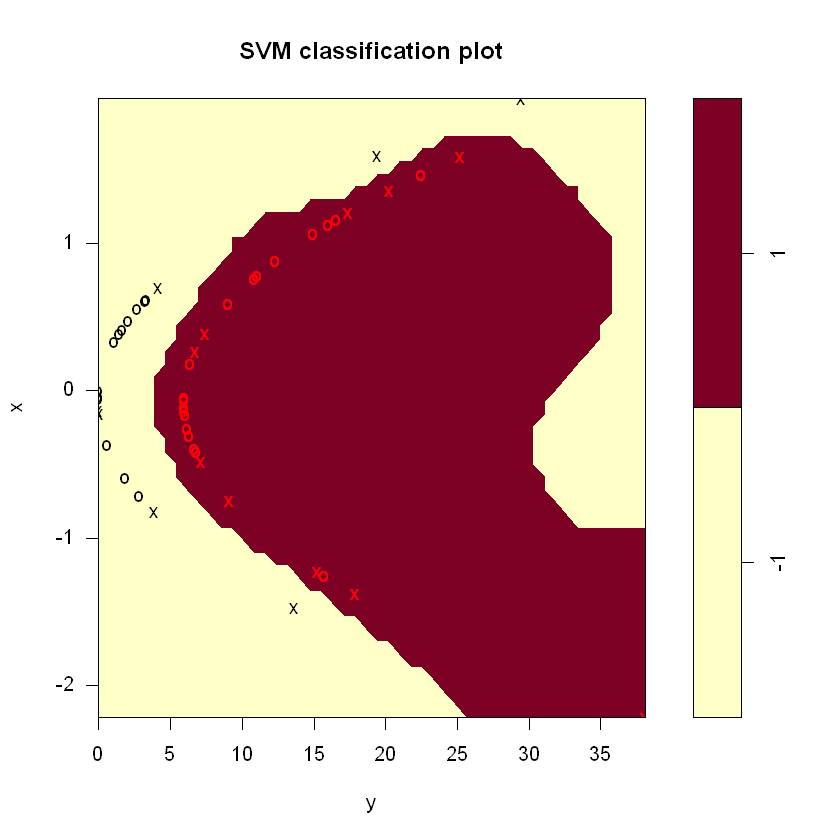

In [8]:
#try with the radial kernel

svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

In [9]:
table(estimations = predict(svm.radial, data.train), true = data.train$z)

           true
estimations -1  1
         -1 20  0
         1   0 30

This time, we have zero error.

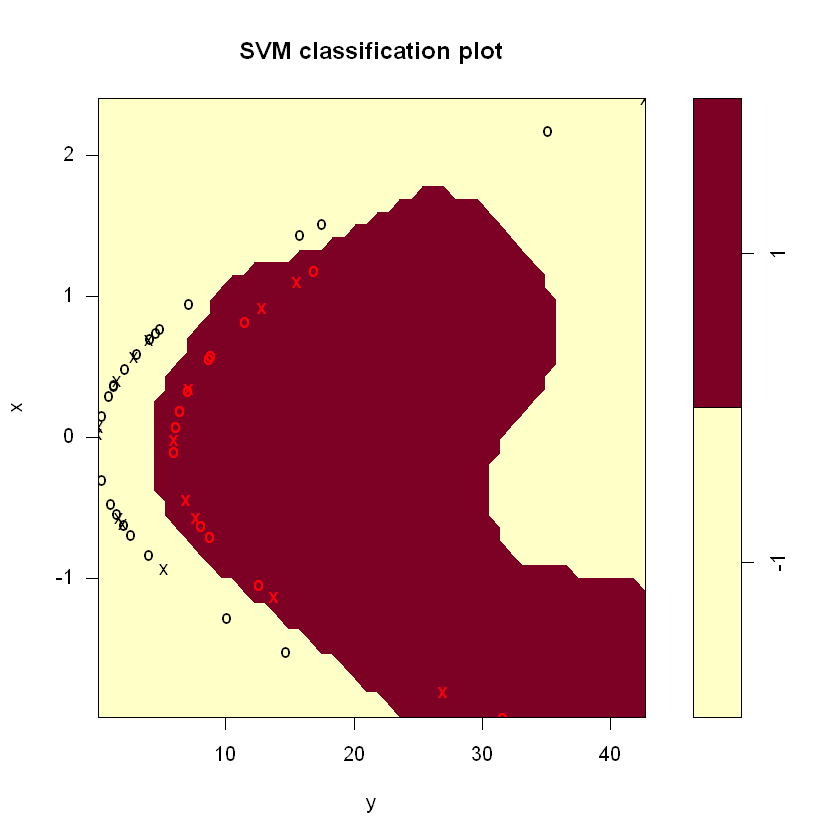

In [10]:
#performance on the test set

plot(svm.radial, data.test)

In [11]:
table(estimations = predict(svm.radial, data.test), true = data.test$z)

           true
estimations -1  1
         -1 30  0
         1   0 20

It also gives zero error on the test set.

To conclude the best model is the support vector machine radial because it predicts perfectly both on train and test sets. 

# exercice 7 page 371

 In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the “Auto” data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [2]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [3]:
Auto$binary = ifelse(Auto$mpg > median(Auto$mpg), 1, 0)

In [4]:
Auto$binary <- as.factor(Auto$binary)

(b) Fit a support vector classifier to the data with various values of “cost”, in order to predict whether a car gets high of low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [5]:
set.seed(21)
library(e1071)
svm.linear <- tune(e1071::svm, binary ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(svm.linear)

Warning message:
"package 'e1071' was built under R version 3.6.3"


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.007692308 

- Detailed performance results:
   cost       error dispersion
1 1e-02 0.076666667 0.03176108
2 1e-01 0.051089744 0.03181401
3 1e+00 0.007692308 0.01238579
4 5e+00 0.017884615 0.01234314
5 1e+01 0.020448718 0.01619554
6 1e+02 0.038269231 0.02488569
7 1e+03 0.038269231 0.02488569


A cost margin of 1 seems to be the best option.

(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of “gamma” and “degree” and “cost”. Comment on your results.

In [6]:
#try with radial kernel

set.seed(21)
svm.radial <- tune(e1071::svm, binary ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(svm.radial)


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01282051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55878205 0.04538579
2  1e-01 1e-02 0.08942308 0.03679590
3  1e+00 1e-02 0.07666667 0.03176108
4  5e+00 1e-02 0.04596154 0.03567807
5  1e+01 1e-02 0.02551282 0.02076457
6  1e+02 1e-02 0.01282051 0.01813094
7  1e-02 1e-01 0.20403846 0.07617157
8  1e-01 1e-01 0.07666667 0.03606898
9  1e+00 1e-01 0.05621795 0.03138634
10 5e+00 1e-01 0.02807692 0.02537217
11 1e+01 1e-01 0.02557692 0.01709522
12 1e+02 1e-01 0.03070513 0.01624058
13 1e-02 1e+00 0.55878205 0.04538579
14 1e-01 1e+00 0.55878205 0.04538579
15 1e+00 1e+00 0.06128205 0.02971730
16 5e+00 1e+00 0.05608974 0.02874269
17 1e+01 1e+00 0.05608974 0.02874269
18 1e+02 1e+00 0.05608974 0.02874269
19 1e-02 5e+00 0.55878205 0.04538579
20 1e-01 5e+00 0.55878205 0.04538579
21 1e+00 5e+00 0.50782051 0.0694

The ideal cost for the radial kernel is 100, and 0.01 for gamma

In [7]:
#try with polynomial kernel

set.seed(21)
svm.poly<- tune(e1071::svm, binary ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(svm.poly, Auto, )


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     1

- best performance: 0.03320513 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55878205 0.04538579
2  1e-01 1e-02 0.55878205 0.04538579
3  1e+00 1e-02 0.54608974 0.05448714
4  5e+00 1e-02 0.30096154 0.08498003
5  1e+01 1e-02 0.27557692 0.08374348
6  1e+02 1e-02 0.23224359 0.10013508
7  1e-02 1e-01 0.27557692 0.08374348
8  1e-01 1e-01 0.23224359 0.10013508
9  1e+00 1e-01 0.07634615 0.05548027
10 5e+00 1e-01 0.06108974 0.04635132
11 1e+01 1e-01 0.04589744 0.03932460
12 1e+02 1e-01 0.04096154 0.03669302
13 1e-02 1e+00 0.04589744 0.03932460
14 1e-01 1e+00 0.04096154 0.03669302
15 1e+00 1e+00 0.03320513 0.02437172
16 5e+00 1e+00 0.03320513 0.02437172
17 1e+01 1e+00 0.03320513 0.02437172
18 1e+02 1e+00 0.03320513 0.02437172
19 1e-02 5e+00 0.03320513 0.02437172
20 1e-01 5e+00 0.03320513 0.02437172
21 1e+00 5e+00 0.03320513 0.0243

For the polynomial kernel, the best cost is 1 and the best gamma is 1.

In [8]:
install.packages("ROCR")
library(ROCR)

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rsmadja\AppData\Local\Temp\RtmpyYpkqE\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.6.3"

In [9]:
svm.linear <- svm(binary ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(binary ~ ., data = Auto, kernel = "polynomial", cost = 1, degree = 1)
svm.radial <- svm(binary ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)


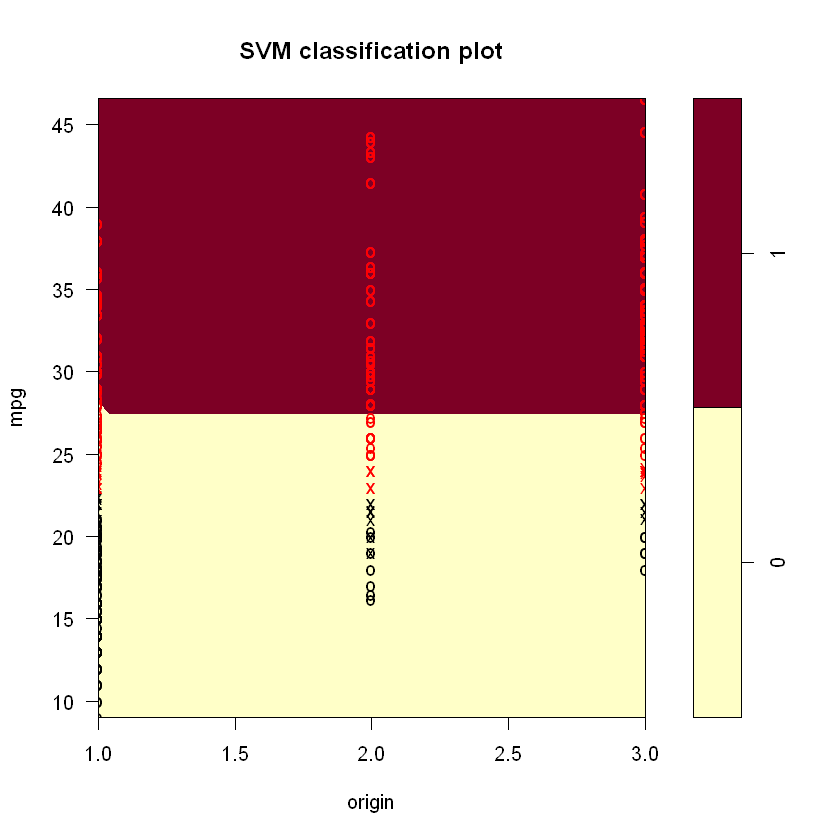

In [10]:
plot(svm.linear, Auto,mpg~origin)

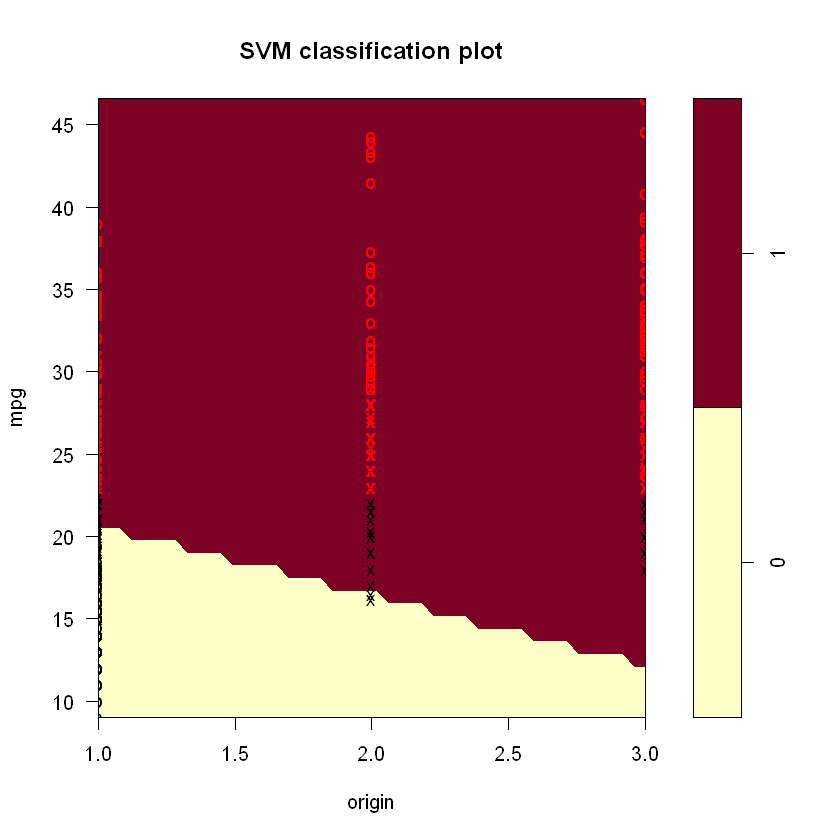

In [11]:
plot(svm.poly, Auto,mpg~origin)

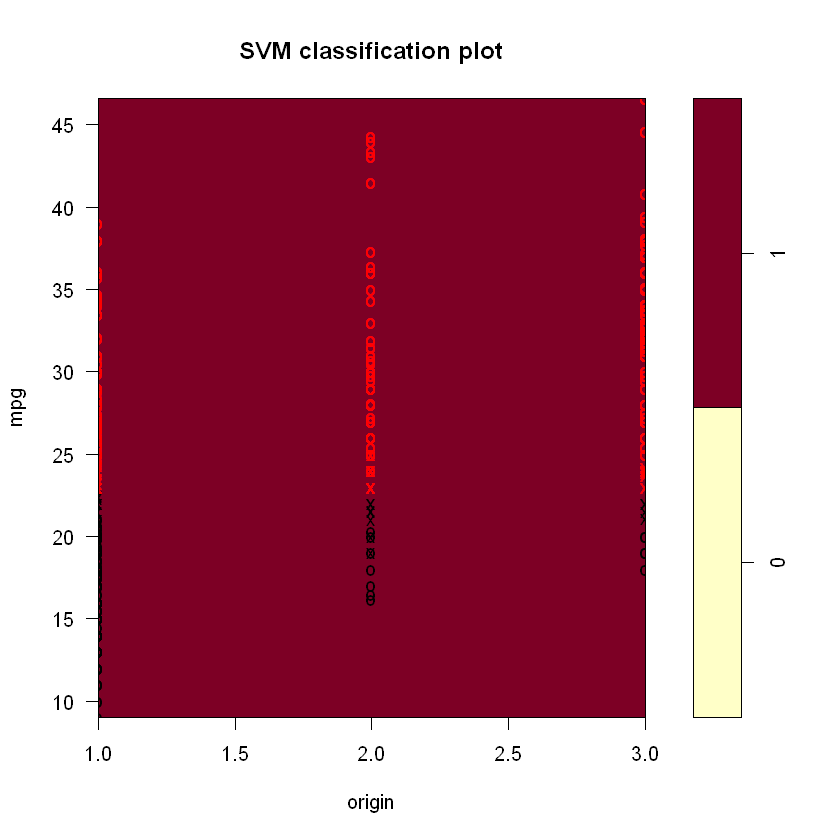

In [12]:
plot(svm.radial, Auto,mpg~origin)

# exercice 8 page 371

This problem involves the “OJ” data set which is part of the ISLR package.

In [13]:
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [14]:
set.seed(21)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

(b) Fit a support vector classifier to the training data using “cost” = 0.01, with “Purchase” as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

In [15]:

set.seed(21)
svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  444

 ( 223 221 )


Number of Classes:  2 

Levels: 
 CH MM




444 support vectors have been created over 800 observations. Aong those 444 vectors, 223 are classified as CH and 221 as MM.

(c) What are the training and test error rates ?

In [16]:
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 430  59
  MM  75 236

In [17]:
(75+59)/(75+59+430+236)*100

[1] 16.75

16.75 train error rate

In [18]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 149  15
  MM  31  75

In [19]:
(31+15)/(149+15+31+75)*100

[1] 17.03704

17.03% test error rate

(d) Use the tune() function to select an optimal “cost”. Consider values in the range 0.01 to 10.

In [20]:
set.seed(21)
tune <- tune(e1071::svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune)


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.3162278

- best performance: 0.175 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17750 0.03855011
2   0.01778279 0.18125 0.03346329
3   0.03162278 0.17875 0.03866254
4   0.05623413 0.18125 0.03186887
5   0.10000000 0.17750 0.03162278
6   0.17782794 0.17750 0.03670453
7   0.31622777 0.17500 0.03679900
8   0.56234133 0.17750 0.03106892
9   1.00000000 0.17625 0.02913689
10  1.77827941 0.18250 0.02958040
11  3.16227766 0.17875 0.02889757
12  5.62341325 0.17750 0.02687419
13 10.00000000 0.17750 0.02486072


The optimal cost seems to be 0.3162278

(e) Compute the training and test error rates using this new value for “cost”.

In [21]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 429  60
  MM  73 238

(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for “gamma”.

In [22]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  376

 ( 190 186 )


Number of Classes:  2 

Levels: 
 CH MM




In [23]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 449  40
  MM  81 230

In [28]:
#calcul of train error

(40+81)/(40+81+449+230)*100

[1] 15.125

In [25]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  17
  MM  30  76

In [29]:
#calcul of test error

(30+17)/(30+17+147+76)*100

[1] 17.40741

The model has created 376support vectors among those 190 are classfied as CH and 186 as MM. Regarding the prediction, they do not progress compared to the linear svm.

In [30]:
set.seed(21)
tune<- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 1.778279

- best performance: 0.175 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38875 0.06192794
2   0.01778279 0.38875 0.06192794
3   0.03162278 0.36750 0.07100469
4   0.05623413 0.20875 0.04332131
5   0.10000000 0.18875 0.02853482
6   0.17782794 0.18625 0.02913689
7   0.31622777 0.18000 0.02958040
8   0.56234133 0.17625 0.03606033
9   1.00000000 0.17875 0.03230175
10  1.77827941 0.17500 0.03333333
11  3.16227766 0.17875 0.03175973
12  5.62341325 0.18625 0.02913689
13 10.00000000 0.18625 0.03030516


In [32]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune$best.parameter$cost)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1.778279 

Number of Support Vectors:  364

 ( 185 179 )


Number of Classes:  2 

Levels: 
 CH MM




In [33]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 448  41
  MM  78 233

In [34]:
#calcul of train error
(78+41)/(448+41+78+233)*100

[1] 14.875

In [35]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  17
  MM  30  76

In [36]:
#calcul of test error

(17+30)/(147+17+30+76)*100

[1] 17.40741

The tuning did not improve the model, the error rates are still the same. The cost was already optimal at 1.

(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set “degree” = 2.

In [37]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  452

 ( 231 221 )


Number of Classes:  2 

Levels: 
 CH MM




In [38]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 460  29
  MM 114 197

In [39]:
#calcul of the train error
(29+114)/(460+29+114+197)*100

[1] 17.875

In [40]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  16
  MM  38  68

In [41]:
#calcul of the test error

(38+16)/(38+16+148+68)*100

[1] 20

The polynomial kernel SVMhas create 452 vectors. Among those ones, 231 are of level CH and 221 MM. The errors are increasing in this model with 17.875 % on the train set and 20% on the test set

In [43]:
set.seed(21)
tune <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.19875 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38875 0.06192794
2   0.01778279 0.36625 0.06873106
3   0.03162278 0.35750 0.07550754
4   0.05623413 0.33250 0.08724168
5   0.10000000 0.32500 0.06846532
6   0.17782794 0.26500 0.05827378
7   0.31622777 0.21500 0.03987829
8   0.56234133 0.21125 0.03458584
9   1.00000000 0.21125 0.03251602
10  1.77827941 0.20125 0.03653860
11  3.16227766 0.19875 0.03606033
12  5.62341325 0.20125 0.03653860
13 10.00000000 0.20375 0.04251225


In [45]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune$best.parameter$cost)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  3.162278 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  398

 ( 204 194 )


Number of Classes:  2 

Levels: 
 CH MM




In [46]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 457  32
  MM  93 218

In [47]:
#calcul of train error

(93+32)/(457+32+93+218)*100

[1] 15.625

In [48]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  16
  MM  32  74

In [49]:
#calcul of the test error


(32+16)/(148+16+32+74)*100

[1] 17.77778

In the case of polynomial model, the tunin has worked to reduces the test error.

(h) Overall, which approach seems to give the best results on this data ?

The radial approach provides de best results but the results are still close to the linear solution